In [49]:
from google.colab.drive import mount, flush_and_unmount

# flush_and_unmount()
mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks/dataset

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/dataset


# Data Preprocessing

In [50]:
import pandas as pd

# read the CSV file for interest rate
interest_rate_data = pd.read_csv('MEI_FIN_16092023044153532.csv')

# create a mapping to change values in the 'Subject' column
def term_rate_mapping(subject):
    if 'Long-term interest rates, Per cent per annum' in subject:
      return 'Long'
    if 'Short-term interest rates, Per cent per annum' in subject:
      return 'Short'
    if 'Immediate interest rates, Call Money, Interbank Rate, Per cent per annum' in subject:
      return 'Intermediate'

# rename the 'Value' column to 'interest_rate'
interest_rate_data.rename(columns={'Value': 'interest_rate'}, inplace=True)

# apply the subject mapping to the 'Subject' column
interest_rate_data['type_interest'] = interest_rate_data['Subject'].apply(term_rate_mapping)

# drop the original 'Subject' column
interest_rate_data.drop(columns=['Subject'], inplace=True)

# cleaned data for interest taking relevant rows
data1 = interest_rate_data[['Country', 'Frequency', 'Time', 'interest_rate', 'type_interest']]

In [51]:
data1.head()

,Country,Frequency,Time,interest_rate,type_interest
0,Australia,Annual,2020,0.920833,Long
1,Australia,Annual,2021,1.480000,Long
2,Australia,Annual,2022,3.200833,Long
3,Australia,Quarterly,Q1-2020,1.006667,Long
4,Australia,Quarterly,Q2-2020,0.896667,Long


In [52]:
# read the CSV file liquidity
liquidity_data = pd.read_csv('MEI_FIN_16092023052431103.csv')

# define a function to map subjects to liquidity types
def map_liquidity_type(subject):
    if 'Narrow Money (M1) Index, SA' in subject:
        return 'Narrow Money (M1)'
    elif 'Broad Money (M3) Index, SA' in subject:
        return 'Broad Money (M3)'
    else:
        return subject  # Keep the original subject for other cases

# rename the 'Value' column to 'liquidity'
liquidity_data.rename(columns={'Value': 'liquidity'}, inplace=True)

# apply the mapping function to the 'Subject' column
liquidity_data['liquidity_type'] = liquidity_data['Subject'].apply(map_liquidity_type)

# cleaned data for liquidity
data2 = liquidity_data[['Country', 'Frequency', 'Time', 'liquidity', 'liquidity_type']]
data2.head()

,Country,Frequency,Time,liquidity,liquidity_type
0,Australia,Annual,2020,181.7957,Narrow Money (M1)
1,Australia,Annual,2021,218.1755,Narrow Money (M1)
2,Australia,Annual,2022,242.9206,Narrow Money (M1)
3,Australia,Quarterly,Q1-2020,161.8155,Narrow Money (M1)
4,Australia,Quarterly,Q2-2020,179.8378,Narrow Money (M1)


In [53]:
# merge data1 and data2 on 'Country', 'Frequency', and 'Time'
df1 = pd.merge(data1, data2, on=['Country', 'Frequency', 'Time'], how = 'inner')

# Now, merged_df contains the merged data from df1 and df2
df1.head()

,Country,Frequency,Time,interest_rate,type_interest,liquidity,liquidity_type
0,Australia,Annual,2020,0.920833,Long,181.7957,Narrow Money (M1)
1,Australia,Annual,2020,0.920833,Long,129.7492,Broad Money (M3)
2,Australia,Annual,2020,0.256667,Short,181.7957,Narrow Money (M1)
3,Australia,Annual,2020,0.256667,Short,129.7492,Broad Money (M3)
4,Australia,Annual,2020,0.100000,Intermediate,181.7957,Narrow Money (M1)


In [54]:
df1.shape

(5502, 7)

In [55]:
# read the CSV file USD rate
usd_rate_data = pd.read_csv('MEI_FIN_16092023053127885.csv')

# rename the 'Value' column to 'USD_RATE'
usd_rate_data.rename(columns={'Value': 'usd_rate'}, inplace=True)

# cleaned dataFrame
data3 = usd_rate_data[['Country', 'Frequency', 'Time', 'usd_rate']]
data3.head()

,Country,Frequency,Time,usd_rate
0,Australia,Annual,2020,1.453532
1,Australia,Annual,2021,1.331484
2,Australia,Annual,2022,1.441797
3,Australia,Quarterly,Q1-2020,1.520858
4,Australia,Quarterly,Q2-2020,1.525713


In [56]:
df2 = pd.merge(df1, data3, on=['Country', 'Frequency', 'Time'], how = 'inner')

# merged data from df1 and data3
df2.head()

,Country,Frequency,Time,interest_rate,type_interest,liquidity,liquidity_type,usd_rate
0,Australia,Annual,2020,0.920833,Long,181.7957,Narrow Money (M1),1.453532
1,Australia,Annual,2020,0.920833,Long,129.7492,Broad Money (M3),1.453532
2,Australia,Annual,2020,0.256667,Short,181.7957,Narrow Money (M1),1.453532
3,Australia,Annual,2020,0.256667,Short,129.7492,Broad Money (M3),1.453532
4,Australia,Annual,2020,0.100000,Intermediate,181.7957,Narrow Money (M1),1.453532


In [57]:
df2.shape

(5144, 8)

In [58]:
# Read the CSV file CPI data
consumer_price_index_data = pd.read_csv('MEI_FIN_16092023053152497.csv')

# Rename the 'Value' column to 'USD_RATE'
consumer_price_index_data.rename(columns={'Value': 'CPI'}, inplace=True)

# Now, your DataFrame is cleaned and transformed
data4 = consumer_price_index_data[['Country', 'Frequency', 'Time', 'CPI']]
data4.head()

,Country,Frequency,Time,CPI
0,Australia,Annual,2020,94.29472
1,Australia,Annual,2021,100.05100
2,Australia,Annual,2022,100.37730
3,Australia,Quarterly,Q1-2020,91.06085
4,Australia,Quarterly,Q2-2020,90.97588


In [59]:
df3 = pd.merge(df2, data4, on=['Country', 'Frequency', 'Time'], how = 'inner')

# Now, merged_df contains the merged data from df1 and df2
df3.head()

,Country,Frequency,Time,interest_rate,type_interest,liquidity,liquidity_type,usd_rate,CPI
0,Australia,Annual,2020,0.920833,Long,181.7957,Narrow Money (M1),1.453532,94.29472
1,Australia,Annual,2020,0.920833,Long,129.7492,Broad Money (M3),1.453532,94.29472
2,Australia,Annual,2020,0.256667,Short,181.7957,Narrow Money (M1),1.453532,94.29472
3,Australia,Annual,2020,0.256667,Short,129.7492,Broad Money (M3),1.453532,94.29472
4,Australia,Annual,2020,0.100000,Intermediate,181.7957,Narrow Money (M1),1.453532,94.29472


In [60]:
df3.shape

(5144, 9)

In [61]:
# Read the CSV file USD rate
share_price_data = pd.read_csv('MEI_FIN_16092023053239654.csv')

# Rename the 'Value' column to 'USD_RATE'
share_price_data.rename(columns={'Value': 'Share Price'}, inplace=True)

# Now, your DataFrame is cleaned and transformed
data5 = share_price_data[['Country', 'Frequency', 'Time', 'Share Price']]
data5.head()

,Country,Frequency,Time,Share Price
0,Australia,Annual,2020,111.1882
1,Australia,Annual,2021,130.4751
2,Australia,Annual,2022,128.3665
3,Australia,Quarterly,Q1-2020,117.4883
4,Australia,Quarterly,Q2-2020,101.6897


In [62]:
data = pd.merge(df3, data5, on=['Country', 'Frequency', 'Time'], how = 'inner')

# Now, merged_df contains the merged data from df1 and df2
data.head()

,Country,Frequency,Time,interest_rate,type_interest,liquidity,liquidity_type,usd_rate,CPI,Share Price
0,Australia,Annual,2020,0.920833,Long,181.7957,Narrow Money (M1),1.453532,94.29472,111.1882
1,Australia,Annual,2020,0.920833,Long,129.7492,Broad Money (M3),1.453532,94.29472,111.1882
2,Australia,Annual,2020,0.256667,Short,181.7957,Narrow Money (M1),1.453532,94.29472,111.1882
3,Australia,Annual,2020,0.256667,Short,129.7492,Broad Money (M3),1.453532,94.29472,111.1882
4,Australia,Annual,2020,0.100000,Intermediate,181.7957,Narrow Money (M1),1.453532,94.29472,111.1882


In [63]:
data.isna().sum()

Country           0
Frequency         0
Time              0
interest_rate     0
type_interest     0
liquidity         0
liquidity_type    0
usd_rate          0
CPI               0
Share Price       0
dtype: int64

# EDA

In [64]:
data.head()

,Country,Frequency,Time,interest_rate,type_interest,liquidity,liquidity_type,usd_rate,CPI,Share Price
0,Australia,Annual,2020,0.920833,Long,181.7957,Narrow Money (M1),1.453532,94.29472,111.1882
1,Australia,Annual,2020,0.920833,Long,129.7492,Broad Money (M3),1.453532,94.29472,111.1882
2,Australia,Annual,2020,0.256667,Short,181.7957,Narrow Money (M1),1.453532,94.29472,111.1882
3,Australia,Annual,2020,0.256667,Short,129.7492,Broad Money (M3),1.453532,94.29472,111.1882
4,Australia,Annual,2020,0.100000,Intermediate,181.7957,Narrow Money (M1),1.453532,94.29472,111.1882


In [65]:
list_country = list(data['Country'].unique())
for country in list_country:
  print(data[data['Country'] == country].iloc[0])
  print("............................................")

Country                   Australia
Frequency                    Annual
Time                           2020
interest_rate              0.920833
type_interest                  Long
liquidity                  181.7957
liquidity_type    Narrow Money (M1)
usd_rate                   1.453532
CPI                        94.29472
Share Price                111.1882
Name: 0, dtype: object
............................................
Country                      Canada
Frequency                    Annual
Time                           2020
interest_rate              0.753109
type_interest                  Long
liquidity                  161.3574
liquidity_type    Narrow Money (M1)
usd_rate                    1.34121
CPI                        96.37074
Share Price                111.7975
Name: 360, dtype: object
............................................
Country             Czech Republic
Frequency                   Annual
Time                          2020
interest_rate             1.128333
ty

In [66]:
import pandas as pd

# Assuming df is your DataFrame
interest_rate_stats = data['interest_rate'].describe()
print(interest_rate_stats)

count    5144.000000
mean        2.801868
std         3.352252
min        -0.630000
25%         0.250000
50%         1.745000
75%         4.100000
max        20.000000
Name: interest_rate, dtype: float64


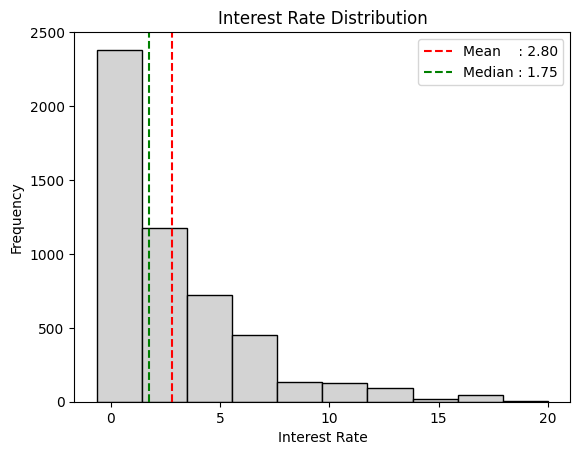

In [67]:
import matplotlib.pyplot as plt
import numpy as np

mean_interest = np.mean(data['interest_rate'])
median_interest = np.median(data['interest_rate'])

# Histogram
plt.hist(data['interest_rate'], bins=10, edgecolor='k', color = 'lightgrey')
plt.axvline(mean_interest, color = 'red', linestyle = '--', label = f'Mean    : {mean_interest:.2f}')
plt.axvline(median_interest, color = 'green', linestyle = '--', label = f'Median : {median_interest:.2f}')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Interest Rate Distribution')
plt.legend()
plt.show()

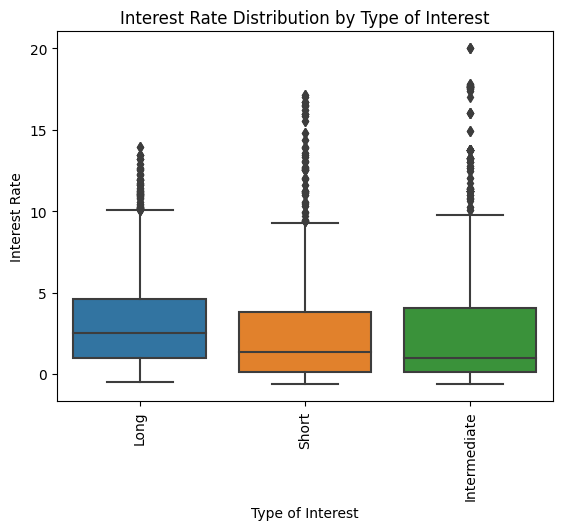

In [68]:
import seaborn as sns

# Box plot of interest rates by type of interest
sns.boxplot(x='type_interest', y='interest_rate', data=data)
plt.xlabel('Type of Interest')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Distribution by Type of Interest')
plt.xticks(rotation=90)
plt.show()

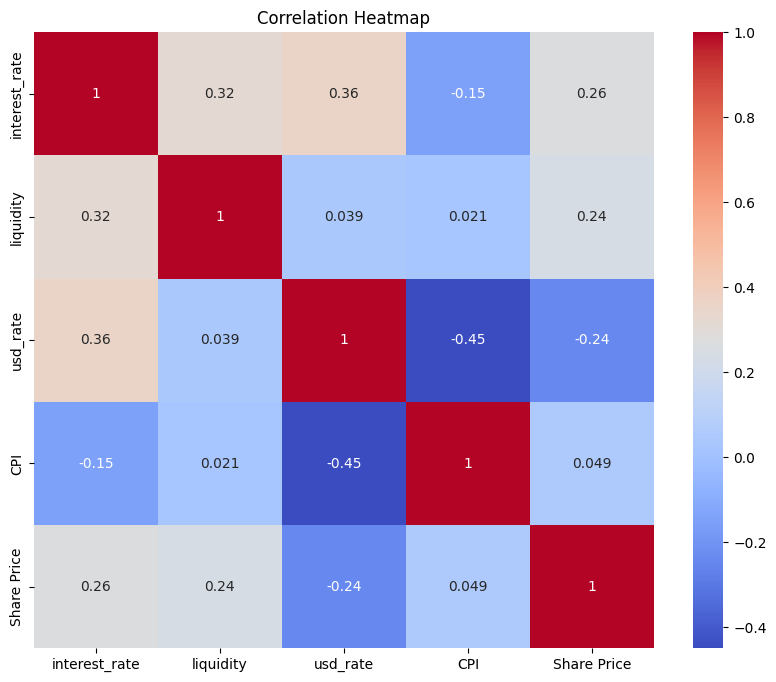

In [48]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
